# Which are the Strongest Teams in the Winter Olympics?

<img src="img/podium.jpeg" width="450" style="display:block; margin:auto;">

The winter olympics is an international competition held every four years across a number of days, events and sports, exclusively on ice and snow. Since originating in 1924, it has grown to be a major event with over 90 countries participating in it, garnering over 20 million daily viewers from the US alone and billions of total views over the days of the event. In this blog, we will be exploring the countries who have been dominating these games and has consistently proven themselves to be the best in these sports.

### Setup

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

### Loading the Data

In [3]:
wolympics_df = pd.read_csv('data/winter_olympics_medals.csv')
bios = pd.read_csv('data/bios.csv')
countries = pd.read_csv('data/country-and-continent-codes-list.csv')
populations = pd.read_csv('data/populations.csv')
world_gdf = gpd.read_file('data/worldmap.json')
bios = bios.dropna(subset = ["born_country"])

### Which Countries Are the Best in the Olympics?

In [11]:
gold_counts = (
    wolympics_df[wolympics_df["medal"] == "Gold"]
      .drop_duplicates(subset=["year", "type", "discipline", "event", "medal", "noc"])
      .groupby("noc")
      .size()
      .reset_index(name="gold_count")
      .sort_values("gold_count", ascending=False)
)

<Axes: title={'center': 'Top 10 countries by total gold medals'}, xlabel='noc'>

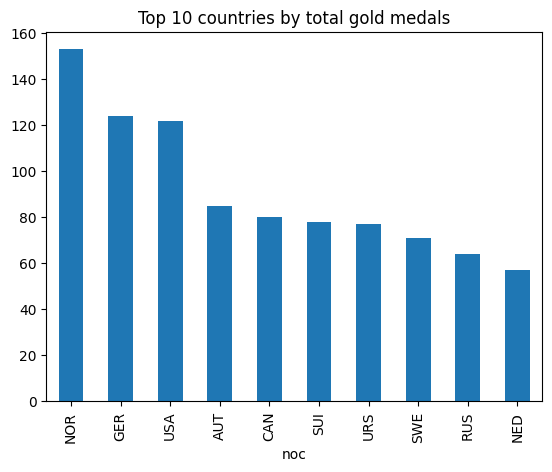

In [7]:
gold_counts.head(10).plot(
    x = "noc",
    y = "gold_count",
    kind = "bar",
    title = "Top 10 countries by total gold medals",
    legend = False
)

Since the fonunding of the games, these countries have topped the rankings in terms of gold medals won. Norway, Germany, USA, Austria and Canada, these five countries some of which are heavily characterised by their heavy yearly snowfall have all been founding members of the winter olympics, having competed since the first ever game in 1924. 

Winning a gold medal is a true tribute to the hard work of the athletes and is an amazing and valuable achievement celebrating the intense training, sacrifice and effort they have all put into the sport. It places them as the best athelete globally in that respect and this ranking shows the countries which have the most dominance in certain sports.

However, an all rounded nature is also important to consider. Besides just the gold medal, countries can win silver and bronze medals to.

In [10]:
medal_counts = (
    wolympics_df[wolympics_df["medal"].isin(["Gold", "Silver", "Bronze"])]
      .drop_duplicates(subset=["year", "type", "discipline", "event", "medal", "noc"])
      .groupby("noc")
      .size()
      .reset_index(name="medal_count")
      .sort_values("medal_count", ascending=False)
)

<Axes: title={'center': 'Top 10 Countries by Total Medals'}, xlabel='noc'>

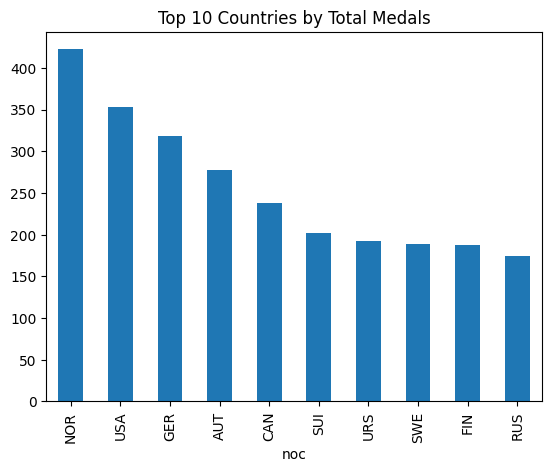

In [9]:
medal_counts.head(10).plot(
    x="noc",
    y="medal_count",
    kind="bar",
    title="Top 10 Countries by Total Medals",
    legend=False
)

Here, we can see that the top five countries remain the same although in terms of total medals earned, the USA shifts ahead of Germany. This indicates that the USA is more competitive across more sports in comparison to Germany who would be more specialised in a certain field. 

However, it is more valuable to analyse the results from recent years as athletes are constantly training and honing their skills to be more competitive every single year. 

In [13]:
winner_2022 = (
    wolympics_df[
        (wolympics_df["year"] == 2022.0) &
        (wolympics_df["medal"].isin(["Gold", "Silver", "Bronze"]))
    ]
    .drop_duplicates(subset=["noc", "event", "medal"])
    .groupby("noc")
    .size()
    .reset_index(name="medal_count")
    .sort_values("medal_count", ascending=False)
)

<Axes: title={'center': 'Top 10 Countries by Medals in 2022'}, xlabel='noc'>

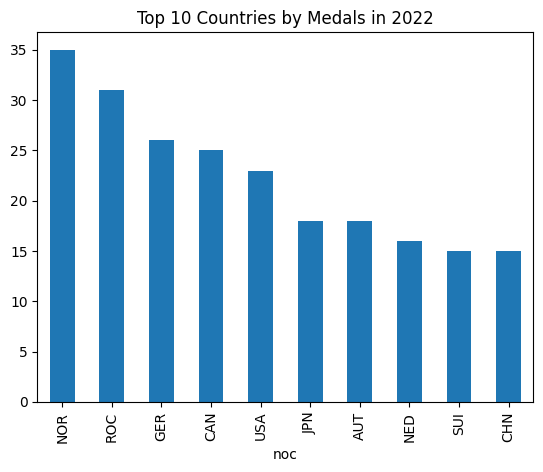

In [14]:
winner_2022.head(10).plot(
    x = "noc",
    y = "medal_count",
    kind = "bar",
    title = "Top 10 Countries by Medals in 2022",
    legend = False
)

By looking at this chart, we can see that as of the last completed Winter Olympic games in 2022, Russia (ROC) has asserted their position as a strong competitor in the games. This was actually the first year the ROC joined the winter olympics, proving that you don't need to be a veteren to be a strong contender. 

### What are Each Country's Strengths?

In [15]:
norway_top = (
    wolympics_df[
        (wolympics_df["noc"] == "NOR") &
        (wolympics_df["medal"].isin(["Gold", "Silver", "Bronze"]))
    ]
    .drop_duplicates(subset=["year", "type", "discipline", "event", "medal", "noc"])
    .groupby("discipline")
    .size()
    .reset_index(name="times_won")
    .sort_values("times_won", ascending=False)
)

norway_top.head(10)


,discipline,times_won
3,Cross Country Skiing (Skiing),144
10,Speed Skating (Skating),89
2,Biathlon,57
1,Alpine Skiing (Skiing),42
8,Ski Jumping (Skiing),36
7,Nordic Combined (Skiing),26
6,Freestyle Skiing (Skiing),10
4,Curling,6
9,Snowboarding (Skiing),5
0,3-on-3 Ice Hockey (Ice Hockey),4


In [16]:
russia_top = (
    wolympics_df[
        (wolympics_df["noc"] == "ROC") &
        (wolympics_df["medal"].isin(["Gold", "Silver", "Bronze"]))
    ]
    .drop_duplicates(subset=["year", "type", "discipline", "event", "medal", "noc"])
    .groupby("discipline")
    .size()
    .reset_index(name="times_won")
    .sort_values("times_won", ascending=False)
)

russia_top.head(10)


,discipline,times_won
1,Cross Country Skiing (Skiing),19
2,Figure Skating (Skating),8
3,Freestyle Skiing (Skiing),5
0,Biathlon,4
6,Short Track Speed Skating (Skating),3
10,Speed Skating (Skating),3
4,Ice Hockey (Ice Hockey),2
5,Luge,1
7,Skeleton (Bobsleigh),1
8,Ski Jumping (Skiing),1


In [17]:
germany_top = (
    wolympics_df[
        (wolympics_df["noc"] == "GER") &
        (wolympics_df["medal"].isin(["Gold", "Silver", "Bronze"]))
    ]
    .drop_duplicates(subset=["year", "type", "discipline", "event", "medal", "noc"])
    .groupby("discipline")
    .size()
    .reset_index(name="times_won")
    .sort_values("times_won", ascending=False)
)

germany_top.head(10)


,discipline,times_won
2,Biathlon,58
8,Luge,54
15,Speed Skating (Skating),40
1,Alpine Skiing (Skiing),34
3,Bobsleigh (Bobsleigh),34
13,Ski Jumping (Skiing),20
10,Nordic Combined (Skiing),19
4,Cross Country Skiing (Skiing),18
14,Snowboarding (Skiing),10
5,Figure Skating (Skating),10


In observing the sports in which their athletes have won medals in for the top three countries of the 2022 Winter Olympics, we can observe a very interesting pattern. Both Norway and Russia seem to be a country that is highly specialised, both excelling at Cross Country Skiing. Meanwhile, Germany on the other hand is a very balanced country, winning a number of medals across a wide range of different sports. 

### Distribution of Medals in 2022

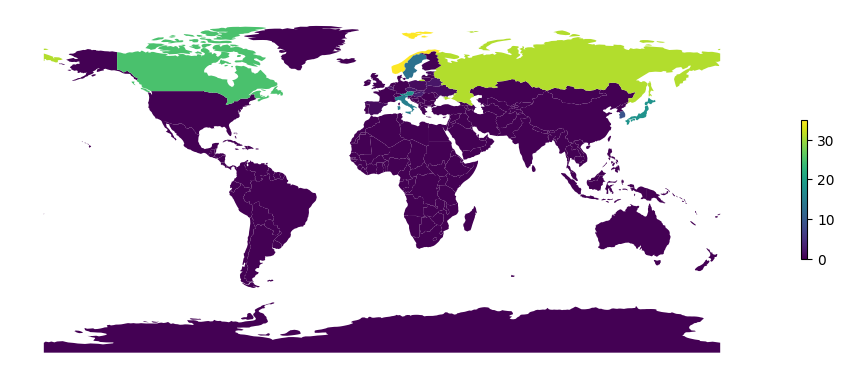

In [18]:
combined_gdf = (
    world_gdf
        .merge(
            winner_2022.assign(
                noc = winner_2022["noc"].replace({"ROC": "RUS"})
            ),
            left_on="sov_a3",
            right_on="noc",
            how="left"
        )
)

combined_gdf["medal_count"] = combined_gdf["medal_count"].fillna(0)

combined_gdf.plot(
    column="medal_count",
    legend=True,
    legend_kwds={"shrink": 0.3},
    figsize=(12, 6),
    cmap="viridis"
)

plt.axis("off")
plt.show()


From the above graph, one more obvious and easily understandable fact is that most of the medals won in 2022 are won by countries in the Northern hemisphere. This makes a lot of sense given that snowfall is quite rare in the southern hemisphere meaning there would be a lot less athletes in the countries to choose from who have experience in snow sports. 